<a href="https://colab.research.google.com/github/youssefbourais0310/Neural_Networks/blob/main/plant_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# checkout the lables of our data
import pandas as pd
labels_csv = pd.read_csv("drive/MyDrive/small_dataset/small_dataset/labels.csv")
print(labels_csv.describe())
print(labels_csv.head())

                                              id            breed
count                                         80               80
unique                                        80                8
top     0a1bb3ddc3761046589e4016555c76aa618adff0  Cirsium_arvense
freq                                           1               10
                                         id            breed
0  0a1bb3ddc3761046589e4016555c76aa618adff0  Cirsium_arvense
1  0a6c1f051b5d941f4f2056b417403f9c5a5c4102  Cirsium_arvense
2  0adaef01f0de47afcf59154b1c3d35eb23339965  Cirsium_arvense
3  0c4f1ec9e2d4da2db013ffa8e3968eb66ce254ef  Cirsium_arvense
4  0c6f5bf7ddcab66369f31bbfd865d12191647987  Cirsium_arvense


In [2]:
labels_csv.head()

,id,breed
0,0a1bb3ddc3761046589e4016555c76aa618adff0,Cirsium_arvense
1,0a6c1f051b5d941f4f2056b417403f9c5a5c4102,Cirsium_arvense
2,0adaef01f0de47afcf59154b1c3d35eb23339965,Cirsium_arvense
3,0c4f1ec9e2d4da2db013ffa8e3968eb66ce254ef,Cirsium_arvense
4,0c6f5bf7ddcab66369f31bbfd865d12191647987,Cirsium_arvense


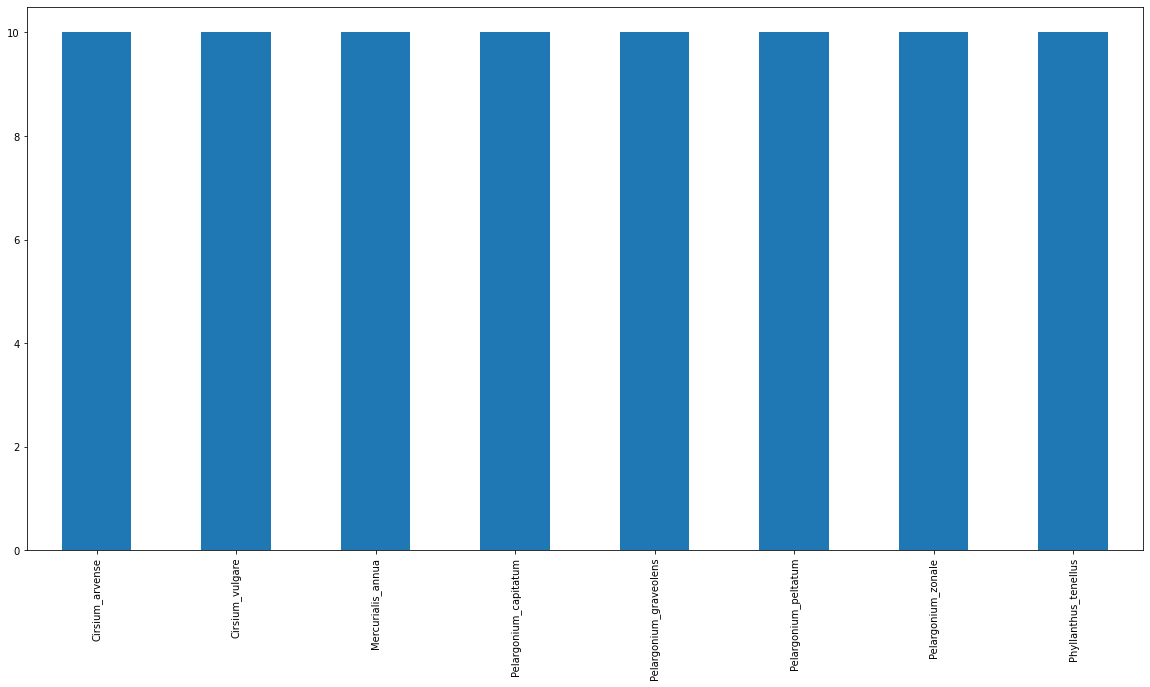

In [3]:
#how many images are there of each breed ?
labels_csv["breed"].value_counts().plot.bar(figsize=(20,10))

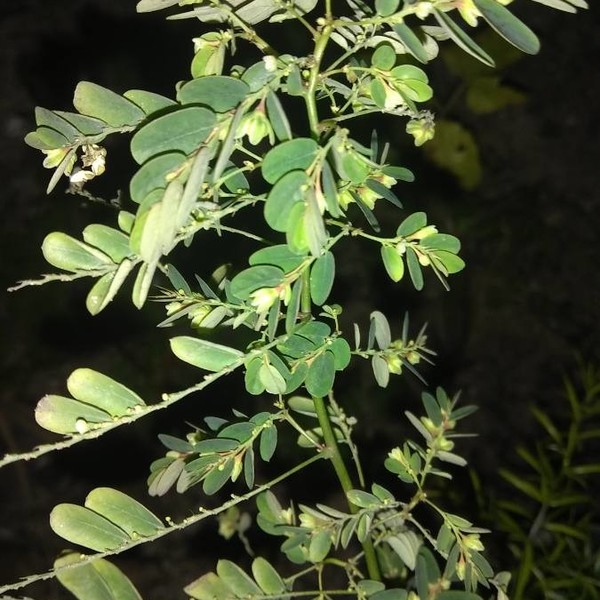

In [4]:
#lets view an image 
from IPython.display import Image 
Image("drive/MyDrive/small_dataset/small_dataset/train/003bbb5fd707e3ab63ab85fcfe155125840bc6c6.jpg")

getting images and their labels

lets get a list of all of our image file pathnames

In [5]:
#create pathnames from images ID 
filepaths = ["drive/MyDrive/small_dataset/small_dataset/train/" + fpath + ".jpg" for fpath in labels_csv["id"]]

# check the first 10
filepaths[:10]

['drive/MyDrive/small_dataset/small_dataset/train/0a1bb3ddc3761046589e4016555c76aa618adff0.jpg',
 'drive/MyDrive/small_dataset/small_dataset/train/0a6c1f051b5d941f4f2056b417403f9c5a5c4102.jpg',
 'drive/MyDrive/small_dataset/small_dataset/train/0adaef01f0de47afcf59154b1c3d35eb23339965.jpg',
 'drive/MyDrive/small_dataset/small_dataset/train/0c4f1ec9e2d4da2db013ffa8e3968eb66ce254ef.jpg',
 'drive/MyDrive/small_dataset/small_dataset/train/0c6f5bf7ddcab66369f31bbfd865d12191647987.jpg',
 'drive/MyDrive/small_dataset/small_dataset/train/0cdbb395ccfbe4f8eafa81f5f8fd2ec0fc246245.jpg',
 'drive/MyDrive/small_dataset/small_dataset/train/0d2e0041ece2dc7394c9ef4a41e8dd29ee7ffdac.jpg',
 'drive/MyDrive/small_dataset/small_dataset/train/0d70e8fb31c619b5bb31a1a27cb73230df035e2d.jpg',
 'drive/MyDrive/small_dataset/small_dataset/train/0db46fad475b7cae4f0b38fbf795d4b5016acdab.jpg',
 'drive/MyDrive/small_dataset/small_dataset/train/0e0e191d7225e364e15b8dbec0a5d12fa033833c.jpg']

In [6]:
# check whether of filenames matches number of actual image files 
import os 
if len(os.listdir("drive/MyDrive/small_dataset/small_dataset/train")) == len(filepaths):
  print("filepaths match actual amount of files ! proceed.")
else :
  print ("filepaths do not match actual amount of files , check the target directory.")

filepaths match actual amount of files ! proceed.


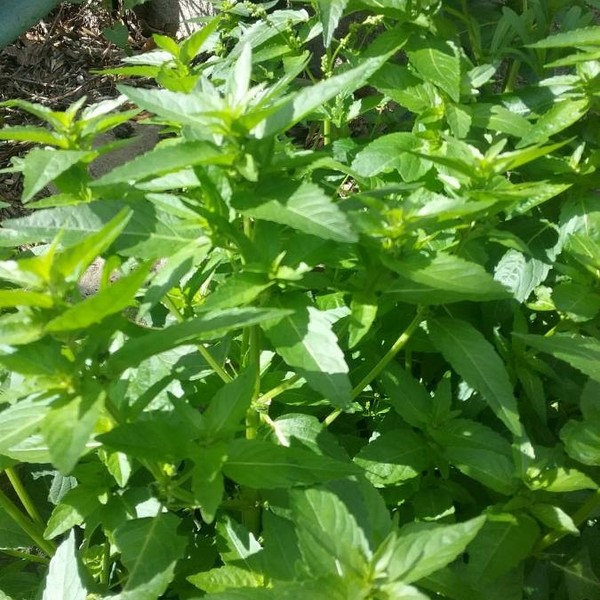

In [7]:
# one more check
Image(filepaths[20])

In [8]:
labels_csv["breed"][20]

'Mercurialis_annua'

##lets prepare our labels

In [9]:
import numpy as np
labels = labels_csv["breed"].to_numpy()
#labels = np.array(labels) #does same thing as above
labels[:10]

array(['Cirsium_arvense', 'Cirsium_arvense', 'Cirsium_arvense',
       'Cirsium_arvense', 'Cirsium_arvense', 'Cirsium_arvense',
       'Cirsium_arvense', 'Cirsium_arvense', 'Cirsium_arvense',
       'Cirsium_arvense'], dtype=object)

In [10]:
len(labels)

80

In [12]:
#see if numbers of labels match  number of filenames 
if len(labels) == len(filepaths):
  print("number of labels matches number of filenames")
else : 
  print("number of labels does not match of file names , check data directories!")

number of labels matches number of filenames


In [13]:
# find the unique label values
unique_breeds = np.unique(labels)
len(unique_breeds)

8

In [14]:
unique_breeds

array(['Cirsium_arvense', 'Cirsium_vulgare', 'Mercurialis_annua',
       'Pelargonium_capitatum', 'Pelargonium_graveolens',
       'Pelargonium_peltatum', 'Pelargonium_zonale',
       'Phyllanthus_tenellus'], dtype=object)

In [15]:
# Turn a single id(photo) into booleans Compared to thier label 
print(labels[79]) #number of id
labels [79] == unique_breeds 

Phyllanthus_tenellus


array([False, False, False, False, False, False, False,  True])

In [16]:
# Turn every id into booleans array Par rapport to thier label 
boolean_labels = [label == unique_breeds for label in labels]
boolean_labels[:20]

[array([ True, False, False, False, False, False, False, False]),
 array([ True, False, False, False, False, False, False, False]),
 array([ True, False, False, False, False, False, False, False]),
 array([ True, False, False, False, False, False, False, False]),
 array([ True, False, False, False, False, False, False, False]),
 array([ True, False, False, False, False, False, False, False]),
 array([ True, False, False, False, False, False, False, False]),
 array([ True, False, False, False, False, False, False, False]),
 array([ True, False, False, False, False, False, False, False]),
 array([ True, False, False, False, False, False, False, False]),
 array([False,  True, False, False, False, False, False, False]),
 array([False,  True, False, False, False, False, False, False]),
 array([False,  True, False, False, False, False, False, False]),
 array([False,  True, False, False, False, False, False, False]),
 array([False,  True, False, False, False, False, False, False]),
 array([Fa

In [17]:
len(boolean_labels)

80

In [18]:
#exemple : turning boolean array into integers 
print(labels[79]) #original label
print(np.where(unique_breeds == labels[79])) #index where label occurs
print(boolean_labels[79].argmax()) #index where label occurs in boolean array
print(boolean_labels[79].astype(int)) # there will be a 1 where the sample occurs

Phyllanthus_tenellus
(array([7]),)
7
[0 0 0 0 0 0 0 1]


In [19]:
filepaths[:2]

['drive/MyDrive/small_dataset/small_dataset/train/0a1bb3ddc3761046589e4016555c76aa618adff0.jpg',
 'drive/MyDrive/small_dataset/small_dataset/train/0a6c1f051b5d941f4f2056b417403f9c5a5c4102.jpg']

##craeting our own validation set

we don't have a  validation set so we are going to creat our own

In [20]:
#setup X & y variable 
X = filepaths
y = boolean_labels

In [21]:
NUM_IMAGES = 80

In [22]:
# lets split our data into train and validation sets
from sklearn.model_selection import train_test_split

#split them into ytaining and validation of total size NUM_IMAGES
X_train,X_val,y_train,y_val = train_test_split(X[:NUM_IMAGES],
                                               y[:NUM_IMAGES],
                                               test_size=0.2,
                                               random_state=42)

len(X_train), len(y_train), len(X_val), len(y_val)

(64, 64, 16, 16)

In [23]:
X_train[:2],y_train[:2]

(['drive/MyDrive/small_dataset/small_dataset/train/42dc0144b80b1839dac70cb4634b8d6d10bcdc8c.jpg',
  'drive/MyDrive/small_dataset/small_dataset/train/0f67b9a7eb42053ed197e8e41b0fdf64f025c6f2.jpg'],
 [array([False, False, False, False, False, False, False,  True]),
  array([False, False, False, False, False, False,  True, False])])

## preproccessing images (turning images into tensors)

### to preproccess our images into tensors we are goin to write a function which does a few things :

   1. take an image filepath as input
   2. use tensorflow to read the file and save it to a variable , "image"
   3. turn our "image" (a jpg) into tensors
   4. normalize our image (convert colour channel values from 0-255 to 0-1)
   5. resize the "images" to be a shape of (224, 224)
   6. return the modified "image"


In [24]:
# convert an image to numpy array
from matplotlib.pyplot import imread
image = imread(filepaths[42])
image.shape 

(600, 600, 3)

In [25]:
image.max(), image.min()

(255, 0)

In [26]:
image[:2]

array([[[209, 177, 216],
        [207, 175, 214],
        [210, 178, 215],
        ...,
        [219, 196, 225],
        [221, 198, 227],
        [223, 200, 229]],

       [[211, 179, 218],
        [209, 177, 216],
        [212, 182, 218],
        ...,
        [219, 196, 225],
        [220, 197, 226],
        [221, 198, 227]]], dtype=uint8)

In [27]:
#import tensorflow into colab
import tensorflow as tf
import tensorflow_hub as hub 
print("TF version:", tf.__version__)
print("TF hub version :", hub.__version__)

#check for GPU avaibility
print("GPU", "avaibility : (YES )" if tf.config.list_physical_devices("GPU") else "not available ")

TF version: 2.7.0
TF hub version : 0.12.0
GPU avaibility : (YES )


In [28]:
# turn image into tensors
tf.constant(image[:2])

<tf.Tensor: shape=(2, 600, 3), dtype=uint8, numpy=
array([[[209, 177, 216],
        [207, 175, 214],
        [210, 178, 215],
        ...,
        [219, 196, 225],
        [221, 198, 227],
        [223, 200, 229]],

       [[211, 179, 218],
        [209, 177, 216],
        [212, 182, 218],
        ...,
        [219, 196, 225],
        [220, 197, 226],
        [221, 198, 227]]], dtype=uint8)>

##now we have seen what an image looks like as a tensor , let s make a function to preprocess them .

   1. take an image filepath as input
   2. use tensorflow to read the file and save it to a variable , "image"
   3. turn our "image" (a jpg) into tensors
   4. normalize our image (convert colour channel values from 0-255 to 0-1)
   5. resize the "images" to be a shape of (224, 224)
   6. return the modified "image"

In [32]:
# Define image size
IMG_SIZE = 224

#creat a funtion for preprocessing images

def process_image(image_path,img_size=IMG_SIZE) :
  """ 
  takes an image file path and turns the image into tensors.
  """
  # read an image file 
  image = tf.io.read_file(image_path)
  # turn the jpeg image into numerical tensors with 3 colour channels (red, green, blue)
  image = tf.image.decode_jpeg(image, channels=3)
  # convert the colour channel values from 0-255 to 0-1 values
  image = tf.image.convert_image_dtype(image, tf.float32)
  # resize the image to our desired value (224, 224)
  image = tf.image.resize(image, size =[IMG_SIZE,IMG_SIZE])

  return image

In [33]:
# creat a simple function to return a tuple (image , label)
def get_image_label(image_path,label) : 

   """
   take an image file path name and assosciatd label,
   processes the image and return a typle of (image, label).
   """
   image = process_image(image_path)
   return image, label 

In [46]:
# Demo of the above
(process_image(X[42]), tf.constant(y[42]))

(<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
 array([[[0.812924  , 0.6929585 , 0.83655465],
         [0.7730418 , 0.6685825 , 0.78608954],
         [0.6548432 , 0.5569278 , 0.6373687 ],
         ...,
         [0.8512442 , 0.7674212 , 0.87953585],
         [0.85758555, 0.7743932 , 0.8857841 ],
         [0.8608156 , 0.7706195 , 0.884345  ]],
 
        [[0.8415504 , 0.7239033 , 0.8578445 ],
         [0.81926024, 0.7174395 , 0.8349465 ],
         [0.80010384, 0.70841587, 0.8046557 ],
         ...,
         [0.8928784 , 0.7773599 , 0.91111314],
         [0.8776595 , 0.7656847 , 0.8933458 ],
         [0.8569328 , 0.7560925 , 0.8792017 ]],
 
        [[0.82541525, 0.70001626, 0.8267833 ],
         [0.8293906 , 0.7130102 , 0.8357206 ],
         [0.8659777 , 0.75979275, 0.8801234 ],
         ...,
         [0.9005715 , 0.7191765 , 0.87535006],
         [0.8797404 , 0.7227804 , 0.8728295 ],
         [0.86945164, 0.7358381 , 0.8815827 ]],
 
        ...,
 
        [[0.07107857, 0.1322832 

##now we've got a way to turn our data into tuples of tensors in the form : "(image, label), let's make a function to turn all of our data (X ,y) into batches

In [ ]:
# define the batche size , 32 is a good start
BATCH_SIZE = 32

#creat a function to turn data into batches
def create_data_batches(X, y = None, batch_size = BATCH_SIZE, valid_data = False, test_data = False) :
  """
  create batches of data out of image (X) and label (y) pairs .
  shuffles the data if its training data but doesnt shuffle if its validation data.
  also accepts test data as input (no labels).
  """

  # if the data is a dataset , we probably dont have labels
  if test_data :
    print("creating test data batches ...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X))) # only filepaths (no labels)
    data_batch = data.map(process_image).batch(BATCH_SIZE)
    return data_batch

  # if the data is a valid dataset , we dont need to shuffle it 
  elif valid_data :
    print("creating validation data batches ...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X), # only filepaths (no labels)
                                               tf.constant(y)))# labels
    data_batch = data.map(get_image_label).batch(BATCH_SIZE)   
    return data_batch   

  else :
    print("creating training data batches ....")
    # turn filepaths and labels into tensors
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X),
                                              tf.constant(y)))    

    # shuffling pathnames and labels before mapping image processor function is faster than shuffling images                        
    data = data.shuffle(buffer_size=len(X))

    # creat (image, label) tuples (this also turns the image path into a preprocessed image)
    data = data.map(get_image_label)

    # turn the trining data into batches
    data_batch = data.batch(BATCH_SIZE)
  return data_batch